In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# most basic example of a class. 

In [2]:
# first class with just a pass. 
class Employee:
    '''just a pass to make sure it works. '''
    pass

In [3]:
#making unique instances of employee class. 
# instance variables contain data that is unique to each instance. 
emp_1 = Employee()
emp_2 = Employee()

emp_1.first = "Mom"
emp_1.last = "Is your Dad"
emp_1.email = "momdad@urmomisurdad.net"
emp_1.pay = 100000000

emp_2.first = "Hobo"
emp_2.last = "Baggins"
emp_2.email = "hobo@richman.net"
emp_2.pay = 1000000000000

print(emp_1.first)
print(emp_2.first)

Mom
Hobo


In [4]:
# each method takes the instance as the first argument. 

class Employee:
    '''A class for employees. '''

    raise_amount = 1.04

    num_employees = 0
    
    # instance variable
    def __init__(self, first, last, pay):
        '''method to get all of our data '''
        self.first = first
        self.last = last
        self.pay = pay
        self.email = first + '.' + last + '@company.com'
        # adding 1 for each employee
        Employee.num_employees += 1
    # instance variable
    def fullname(self):
        '''method to give us full name'''
        return '{} {}'.format(self.first, self.last)
    
    # class variable
    def apply_raise(self):
        '''A class variable is a variable or attribute 
        of a class that is common to all instances of a class.'''
        self.pay = int(self.pay * self.raise_amount)

    # class method
    @classmethod
    def set_raise_amount(cls, amount):
        cls.raise_amount = amount

    @staticmethod
    def is_workday(day):
        '''A static method works like a normal method, 
        in that it doesn't take its "self" as an arguement. 
        But it is relevant to the over all class. '''

        if day.weekday() == 5 or day.weekday() == 6:
            return False
        return True



class Developer(Employee):

    '''this Developer class is inheriting Employee class
    aka has all its funcitonality'''

    raise_amt = 1.10

    def __init__(self, first, last, pay, prog_lang):
        '''this is a way to modify the original instance
        without messing witht he code.'''
        super().__init__(first, last, pay)
        self.prog_lang = prog_lang


class Manager(Employee):
    '''a class for managers (from Employee),
    so why on __init__ employees = None and not 
    an empty list? don't worry about it....
    thats why....'''
    def __init__(self, first, last, pay, employees = None):
        '''this is a way to modify the original instance
        without messing witht he code.'''
        super().__init__(first, last, pay)
        if employees is None:
            self.employees = []
        else:
            self.employees = employees
    
    def add_employee(self, emp):
        if emp not in self.employees:
            self.employees.append(emp)

    def remove_employee(self, emp):
        if emp in self.employees:
            self.employees.remove(emp)
    
    def print_emp(self):
        for emp in self.employees:
            print("--->", emp.fullname())

In [5]:

print(Employee.num_employees)
emp_1 = Employee("Thor", "Odenson", 250)
emp_2 = Employee("Loki", "Odenson", 250)
print(Employee.num_employees)
emp_3 = Employee("Cat", "Dog","50")
print(Employee.num_employees)
#how to see everything inside of the instance
print(emp_2.__dict__)


#how to see everything inside of the class
print(Employee.__dict__)

emp_1.raise_amount = 1.05

Employee.set_raise_amount(1.07) # will also change instance. 

print(Employee.raise_amount)
print(emp_2.raise_amount)
emp_3.raise_amount = 1.08
#instance raise_amount is different that class raise_amount

print(emp_3.raise_amount)

0
2
3
{'first': 'Loki', 'last': 'Odenson', 'pay': 250, 'email': 'Loki.Odenson@company.com'}
{'__module__': '__main__', '__doc__': 'A class for employees. ', 'raise_amount': 1.04, 'num_employees': 3, '__init__': <function Employee.__init__ at 0x7fa1030b1040>, 'fullname': <function Employee.fullname at 0x7fa1030b10d0>, 'apply_raise': <function Employee.apply_raise at 0x7fa1030b1160>, 'set_raise_amount': <classmethod object at 0x7fa1030af520>, 'is_workday': <staticmethod object at 0x7fa1030af550>, '__dict__': <attribute '__dict__' of 'Employee' objects>, '__weakref__': <attribute '__weakref__' of 'Employee' objects>}
1.07
1.07
1.08


In [6]:
# checking static method
my_date = datetime.date(1998,12,4)

Employee.is_workday(my_date)

True

In [7]:
# Developer example
dev_1 = Developer("loli","ascuqhu",40000,"Python")
dev_2 = Developer("asdf","qqws",79898989,"Java Script")

In [8]:
# manager example. 
mgr_1 = Manager("Sue","Smith",300000,[dev_1])
mgr_2 = Manager("Dwayne","Johnson",300000, [dev_2])

mgr_2.add_employee(dev_1)

mgr_2.print_emp()

# using isinstance() to check what is an instance of what
print(isinstance(mgr_2, Manager))
print(isinstance(dev_1, Manager))
print(isinstance(dev_1, Developer))

# using issubclass to tell us if something is a subclass of another
print(issubclass(Developer, Employee))
print(issubclass(Manager, Developer))

---> asdf qqws
---> loli ascuqhu
True
False
True
True
False


In [9]:
# practice opening nyc open data api. 
from pprint import pprint
import requests

url = "https://data.cityofnewyork.us/resource/vx8i-nprf.json"

In [10]:
res = requests.get(url)
json = res.json()


df = pd.read_json(url)
# for data in json:
#     print(data)


In [11]:
# dropping names
def drop_names(self):
    '''to drop the names of people in data sets.'''

    self.drop(list(self.filter(regex = "name|mi")), axis = 1, inplace = True)

    return(self)

df = drop_names(df)



In [12]:
# grabbing neccessarly info. 
df = df[["list_agency_desc","adj_fa"]]



# The Below code shoes that there isn't enough 
# variability in the category of interest (Application Intention)

In [13]:

df.list_agency_desc.value_counts()

OPEN COMPETITIVE                          932
DEPARTMENT OF EDUCATION                    25
OFFICE OF THE COMPTROLLER                  19
POLICE DEPARTMENT                           9
NYC EMPLOYEES' RETIREMENT SYSTEM            5
HRA/DEPARTMENT OF SOCIAL SERVICES           4
TEACHERS' RETIREMENT SYSTEM                 3
ADMINISTRATION FOR CHILDREN'S SERVICES      2
DEPARTMENT OF CITY PLANNING                 1
Name: list_agency_desc, dtype: int64

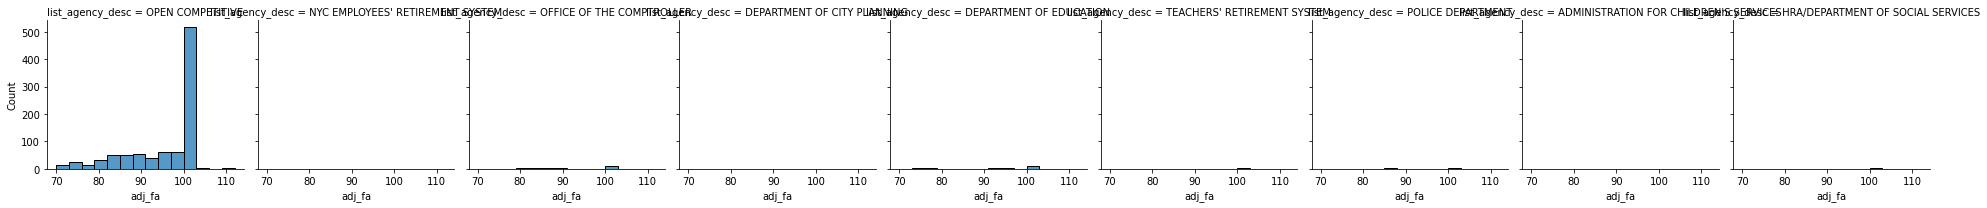

In [14]:
sns.displot(df,x="adj_fa", col = "list_agency_desc",
            binwidth=3, height=3, facet_kws=dict(margin_titles=True))

# this histogram shows that 
        